# Interspeech


In [1]:
import matplotlib.pyplot

In [2]:
import numpy as np

import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from sklearn.model_selection import train_test_split
import random

import keras
from keras import backend as K
from keras import layers

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import tensorflow as tf

from keras.layers.core import Dense, Permute, Reshape
from keras.layers.convolutional import Convolution2D
from keras.layers.normalization import BatchNormalization
from keras.layers.wrappers import Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.regularizers import l2

/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
global X, T
X=[]
T=[]

In [4]:
def loaddata(filename,num):
    f=sio.loadmat(filename)
    data=f['cep']
    data=np.asarray(data)
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    data=(data-mean)/std
    data=np.asarray(np.vsplit(data[0:int(data.shape[0]/data.shape[1])*data.shape[1]],int(data.shape[0]/data.shape[1])))
    for i in range (data.shape[0]):
        X.append(data[i])
        T.append(num)
    return X, T

In [5]:
X,T = loaddata('punjabi.mat',0)

In [6]:
len(X), len(T)

(5623, 5623)

In [7]:
X,T = loaddata('malayalam.mat',1)

In [8]:
len(X), len(T)

(11898, 11898)

In [9]:
X,T = loaddata('bengali.mat',2)

In [10]:
len(X),len(T)

(18251, 18251)

## Split Dataset

In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(np.array(X),np.array(T), train_size=0.8, random_state=30)
np.array(Xtrain).shape, np.array(Xtest).shape

/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((14600, 39, 39), (3651, 39, 39))

## Convert 2D dataset to a 1D vector

In [12]:
batchSize=128
num_classes=3
epochs=10
imageRows, imageCols =39,39

In [13]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], imageRows, imageCols, 1)
Xtest = Xtest.reshape(Xtest.shape[0], imageRows,imageCols, 1)
input_shape = (imageRows, imageCols, 1)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [14]:
input_shape

(39, 39, 1)

In [15]:
Ytrain = keras.utils.to_categorical(Ytrain, num_classes)
Ytest = keras.utils.to_categorical(Ytest, num_classes)

## Define CNN Model

In [16]:
weight_decay = 0.001

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # (bs, y, x, c) --> (bs, x, y, c)
model.add(Permute((2, 1, 3)))

    # (bs, x, y, c) --> (bs, x, y * c)
bs, x, y, c = model.layers[-1].output_shape
model.add(Reshape((x, y*c)))

model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
model.add(Dense(num_classes, activation="softmax"))

/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), kernel_regularizer=<keras.reg..., input_shape=(39, 39, 1..., activation="relu", padding="same")`
  """
/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(3, 3), activation="relu", kernel_regularizer=<keras.reg..., padding="same")`
  if __name__ == '__main__':
/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_size=(3, 3), activation="relu", kernel_regularizer=<keras.reg..., padding="same")`
  del sys.path[0]
/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, k

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 39, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 39, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 19, 19, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         295168    
__________

## Model Train

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [19]:
speechTrainData=model.fit(Xtrain, Ytrain,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(Xtest, Ytest))

Train on 14600 samples, validate on 3651 samples
Epoch 1/10
14600/14600 [==============================] - 892s 61ms/step - loss: 2.0170 - acc: 0.8391 - val_loss: 1.6811 - val_acc: 0.9063
Epoch 2/10
14600/14600 [==============================] - 1053s 72ms/step - loss: 1.2963 - acc: 0.9486 - val_loss: 1.9143 - val_acc: 0.6965
Epoch 3/10
14600/14600 [==============================] - 1143s 78ms/step - loss: 0.8916 - acc: 0.9695 - val_loss: 2.8006 - val_acc: 0.5215
Epoch 4/10
14600/14600 [==============================] - 1173s 80ms/step - loss: 0.6726 - acc: 0.9758 - val_loss: 0.5683 - val_acc: 0.9773
Epoch 5/10
14600/14600 [==============================] - 992s 68ms/step - loss: 0.4981 - acc: 0.9766 - val_loss: 1.2390 - val_acc: 0.7784
Epoch 6/10
14600/14600 [==============================] - 1151s 79ms/step - loss: 0.3672 - acc: 0.9852 - val_loss: 1.4258 - val_acc: 0.6239
Epoch 7/10
14600/14600 [==============================] - 1491s 102ms/step - loss: 0.2958 - acc: 0.9850 - val_los

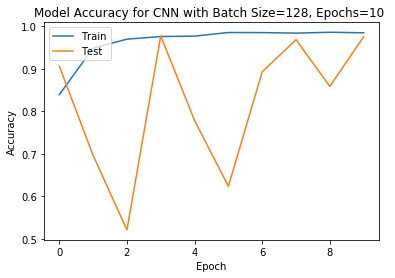

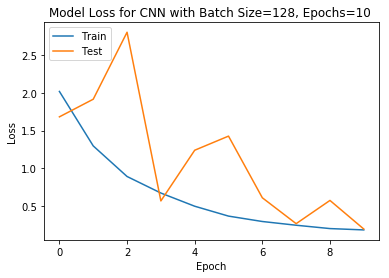

In [20]:
plt.plot(speechTrainData.history['acc'])
plt.plot(speechTrainData.history['val_acc'])
plt.title('Model Accuracy for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot Model  Loss
plt.plot(speechTrainData.history['loss'])
plt.plot(speechTrainData.history['val_loss'])
plt.title('Model Loss for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()